# DATA SCIENCE PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df1 = pd.read_csv('bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape 

(13320, 9)

#### Check all unique values in area_type column

In [4]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

#### Print count of data samples in each of these area_type column

In [5]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

#### Drop features that are not required to build our model

In [6]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [7]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# DATA CLEANING PART

###  Check and Remove NA values

In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Since we have around 13k datas, its fine to drop these NA values since its less

In [9]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### Explore size column
Once this is done, lets explore the size column, you can see in size column that some values are like 2BHK, 3BHK but then there are some values like 4 Bedroom so lets just print unique values in size column and see whats going on

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

You can see above, there are different values like 4 Bedroom and 4 BHK, but they are essentially the same thing, so we need to fix this up!
#### Creating new bhk column
So to take into account for this kind of problem, we will just create a new column called BHK and apply a function which will seperate the numbers like '2' from 'BHK' or 'Bedroom' and we will take the number only and store it in our new BHK column

In [11]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\User\AppData\Local\Temp\ipykernel_740\2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

You can see, now we have bhk column with just the num of bhk, now that this problem is fixed, we can see above that there are like some rooms with 43 bhk or 18 bhk, which seems too big, so lets check them out as well

Lets check all data with bhk greater than 20

In [14]:
df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


You can see there are 2 homes above 20 bhk, one with 43 bhk but the total sqrt feet is 2400 only, so this kind of looks like an Error cuz you cant have 2400 sqrt foot home with 43 bedrooms, so we ar going to clean up this error a lil later

In order to tackle this error, we will need to explor the **total_sqft** column

### Explore total_sqft column

In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

One thing u can notice above is there are these kind of values "1133 - 1384", which is not just a single value, it is a range, now we want to convert this into a single value, one of the ways we can do that is by Taking an Average of those 2 numbers

First, lets create a function that can check if a given value in **total_sqft** column is float or not

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

Now we will apply this is_float() function

In [17]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


As we can see we have plenty of values with ranges and not float and we can also see that we also have values such as "34.46Sq. Meter" and "4125Perch", so we can see this is a typical problem in any Data Science project where your data is not uniform, unstructured, contains outliers, has errors or has alot of problems so majority of the time a Data Scientist spends time on Data Cleaning so we are doing that Data Cleaning right now!

So to handle this non uniformity, what we will do is, wherver we have those type of range values, we will take average of it and wherever we have values like this "34.46Sq. Meter" or "4125Perch" we will just ignore those rows

If u want to make ur model a lil sphisticated, u can do a unit conversion from meter to sqrft or perch to sqrft, depends on u, but we will just ignore them

So we will write a function which takes these range as an input and returns the Average value.

What we did in the function is, we take range as input, then split it with the "-" hyphon sign then if the tokens are 2, we convert individual toekns to float and we take the Average oherwise if token is not 2, meaning its not a range just a normal number than we convert it into a Float

In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

Lets test the function on a single number

In [19]:
convert_sqft_to_num('2166')

2166.0

You can see, if its a normal num, it convert it to float, now lets try a range

In [20]:
convert_sqft_to_num('2100 - 2850')

2475.0

You can see it took the Average of those 2 numbers

Now we will apply this function on our total_sqft column, we are creating a new Dataframe for each process we are doing, so untill now we have df3, now we will copy it all in df4

In [21]:
df4 = df3.copy()

Now we will apply the convert_sqft_to_num() function on our df4 by overwriting the total_sqft column 

In [22]:
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


To see a specific row like at row 30 we have a range so if wee check it using loc method u can see now its a single value as it took the Average of both number

In [23]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

As you can see now its 2475 sqft cuz if you take the average of 2100 - 2850 you get 2475

In [24]:
(2100 + 2850)/2

2475.0

So, so far we have cleaned up our **total_sqft** column, we have handled our NA values and have removed some unnecessary features so our Dataframe looks much better now!

# Feature Engineering

Now we will look into Future Engineering and Dimensionality Reduction techniques

In [25]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


Now we will copy df4 into a new dataframe again called df5

In [26]:
df5 = df4.copy()
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


We all know that in Real state market, the price per square feet is very important and this feature will help us do some Outliers cleaning in the later stage!

So we will do some Feature engineering here and creating a new feature which can be helpful for Outliers detection and removal in the later stage, this column is nothing but a division of 2 columns (price and total_sqft), also multiplying it qwith 1 lakh rupees

In [27]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Ok, so now we have this column here, lets keep this column for later.

Meanwhile, will now explore location column, lets say we want to check how many locations are there and how many rows are available in our dataset per location, location is a categorical feature here and if u have too many locations it can create a problem, lets first check total number of unique locations we have

In [28]:
len(df5.location.unique())

1304

You can see that we have like 1.3k locations which is a big number cuz usually to handle text datas we convert it into dummy columns using one hot encoding and if we keep all these locations, whats gonna happen is, we will have around 1.3k columns in our dataframes which is just too much like soooo many features, this is called **Dimensionality curse** or a **High dimensionality** problem.

There are techniques available to reduce the dimensions, one of the very effective technique is to come up with this "other" category in the location column, by "other" means, when u have 1.3k locations, u will have many locations which will have only 1 or 2 datapoints

So how do u find that, so lets do smth to figure out how many datapoints are available per location, and before we do that, lets first strip any extra spaces from the location so that our data is clean and u can do that as below

In [29]:
df5.location = df5.location.apply(lambda x: x.strip())

Above code will just remove any extra spaces, now, we will create a new variable whuch will give us count per locations

In [30]:
location_stats = df5.location.value_counts()
location_stats

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

You can see above, there are plenty of locations which has only 1 or 2 datapoints/rows, so we can come up with some Treshold and say that Any location which has lets say less than 10 datapoints is called "other" location.

First lets see how many locations have less than 10 datapoints

In [31]:
len(location_stats[location_stats<=10])

1052

In [32]:
len(location_stats)

1293

In [33]:
len(location_stats[location_stats>10])

241

You can see that there are 1052 out of 1293 locations which has less than 10 datapoints, which is prety huge,  and we have 241 locations that has greater than 10 datapoints

So now we have use this to qualify these 1052 locations as "other" locations

## Dimensionality Reduction
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [34]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1052, dtype: int64

Above is all the locations with less than 10 datapoints stored in "location_stats_less_than_10" variable, below we will apply a lambda function that says this location is other if x is in "location_stats_less_than_10" else just leave it as it is

In [35]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

Now all those locations in "location_stats_less_than_10" will be converted to "other" in the location column

Now if we print the unique location value count u will find that now we only have 242 unique locations

In [36]:
len(df5.location.unique())

242

So, this is pretty good cuz when we later on convert this into One Hot Encoding, we will have only 242 columns

In [37]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Removal Using Business Logic

Now we will do some Outliers detection and removal

We can aply different techniques to detect and remove outliers, and these techniques are like you either use Standard Deviation or u can use a simple Domain knowledge

One of the things in Real Estate domain is that, when u have lets say 2BHK, it cant be 500 sqft, cuz usually, like look at the data above, like for example here is 1056 sqft but its 2bhk, so if u just divide 1056 / 2 = 528 sqft per bedroom

Now we want to first look at any data rows where the sqft per bedroom is less than some Threshold

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

So now we will try to find out the datas where this Threshold is not matched, and the way we do that is we will juts divide total_sqft by bhk column then we will see if its less than 300 then show me the value

In [38]:
df5[df5.total_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

First lets see how many rows we have in our DF

In [39]:
df5.shape

(13246, 7)

Now will remove those outliers by creating a new DF called df6 and here we want to negate it, use ~ 

In [40]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

So we have removed these Outliers and now our rows are like 12k

## Outlier Removal Using Standard Deviation and Mean

So this is one of the ways of removing Outliers, now we can have even more Outleirs, for example, lets check price_per_sqft column, lets look at the price_per_sqft where the price is very vry high or very very low

In [41]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

When we run it, we can find that the min value is 267 rupees per sqft although in Banglore to get a property with 267 rs per sqft is very very unlikely, and similarly the max is 176470 rs per sqft which is Extremely high, well this can be possible if the property is in a very prime area but as we are going t buid a very generic model it makes sence to remove this kind of extreme cases

So we are going to write a function that can remove these extreme cases based on a Standard Deviation, now if the dataset has a normal destribution which we are assuming then most of the data points around i think 68% datapoints should lay between mean and 1 standard deviation

So we are going to filter out anything which is beyond 1 Std

Now we have to do this per location cuz some location will have high prices and sme less so what we wanna do is per location we wanna find mean and standard devisation and then filter out any datapoints which are beyond 1 STD 

In [42]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

So lets call this function on df6 and store it on a new DF called df7

In [43]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

So we have removed price_per_sqft column outliers and now we have a new DF df7 which has now 10k datas, so so far we have removed a good amount of unnecessary datas

Now one more thing we wanna check in our dataset is wheter the property price for 3BHK are more than the property price of 2BHK or not for the same Square foot area, for example below
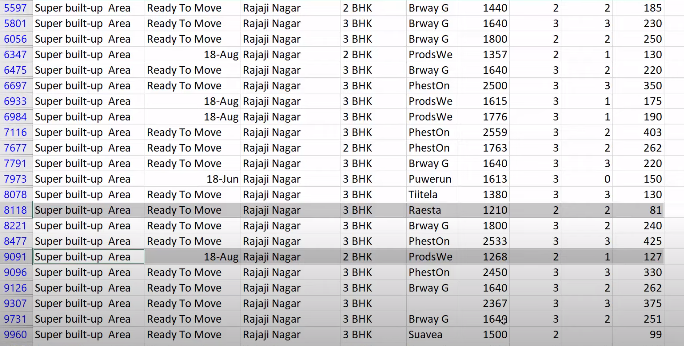
We can see that 2 properties have same sqaure foot around 1200 but the 3BHK price is 81 lakh whereas the 2BHK price is 1 cr 27 lakh, so even tho the sqft is same but the less no of bedrooms we have the proeprty price is higher, well this could be due to many reasons like we dont know, could be cuz the 2BHK is in a more prime area, etc 

So we want to do a Visualization of how many such cases we have, for which we are going to write a function which will use a scatter plot to give us this Visualization.

What this function will do is, it will draw a Scatter plot on which it will plot 2BHK and 3BHK, so this function takes a DF and a location as an input, it creates 2 different DF where for same location u will have datapoints for 2BHK and 3BHK and then it will plot a Scatter plot.

In [44]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()


Passing in the DF and location in the function to check

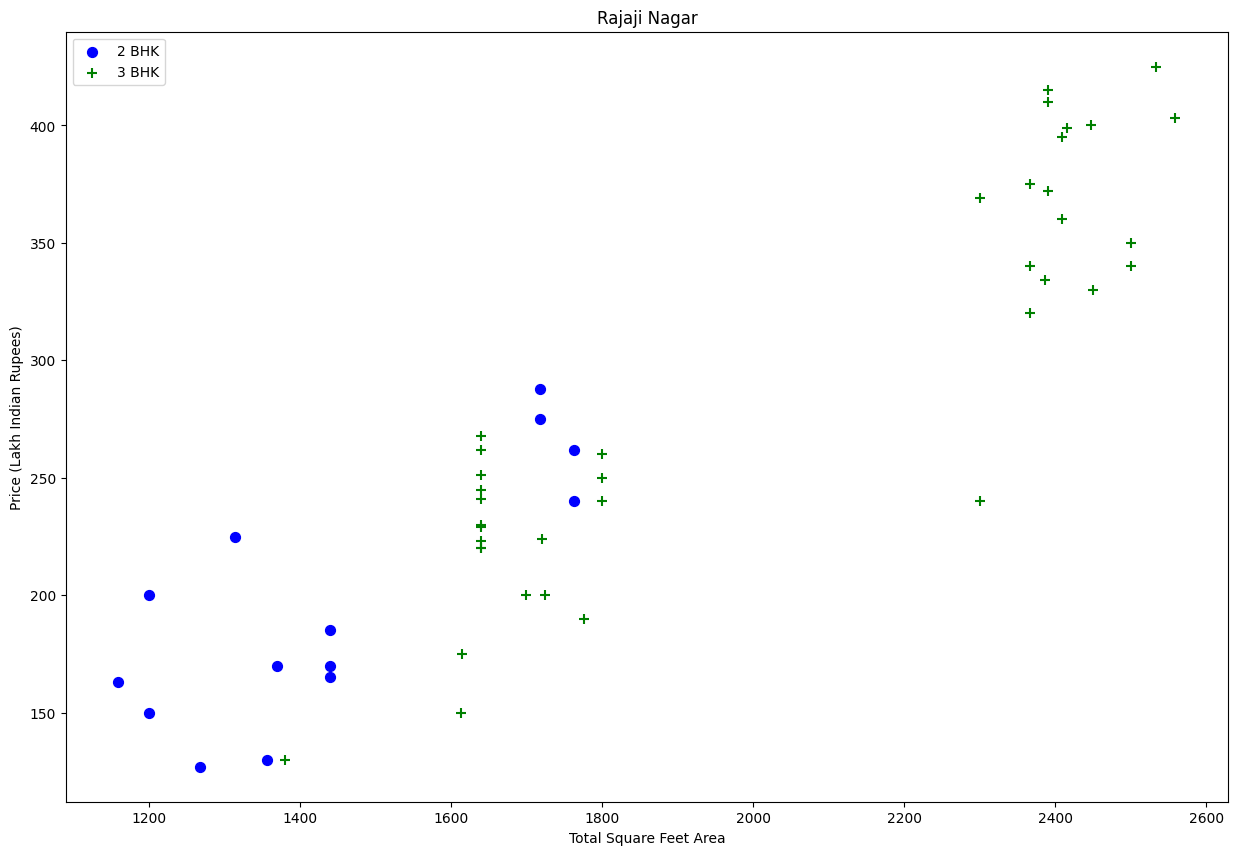

In [45]:
plot_scatter_chart(df7,"Rajaji Nagar")

So above u can see, blue points are 2BHK and green are 3BHK, X axis has total_sqft and the y axis has price, so what we can see is, we have some datapoints as we can see around 1700-1800 total_sqft area, the 2BHK prices are higher than the 3BHK, so we have these like 4 blue datapoints which is higher than 3BHK for same sqft area, so we wanna remove some of these outliers

We can run the same func for a different location lets say on Hebbal location as well

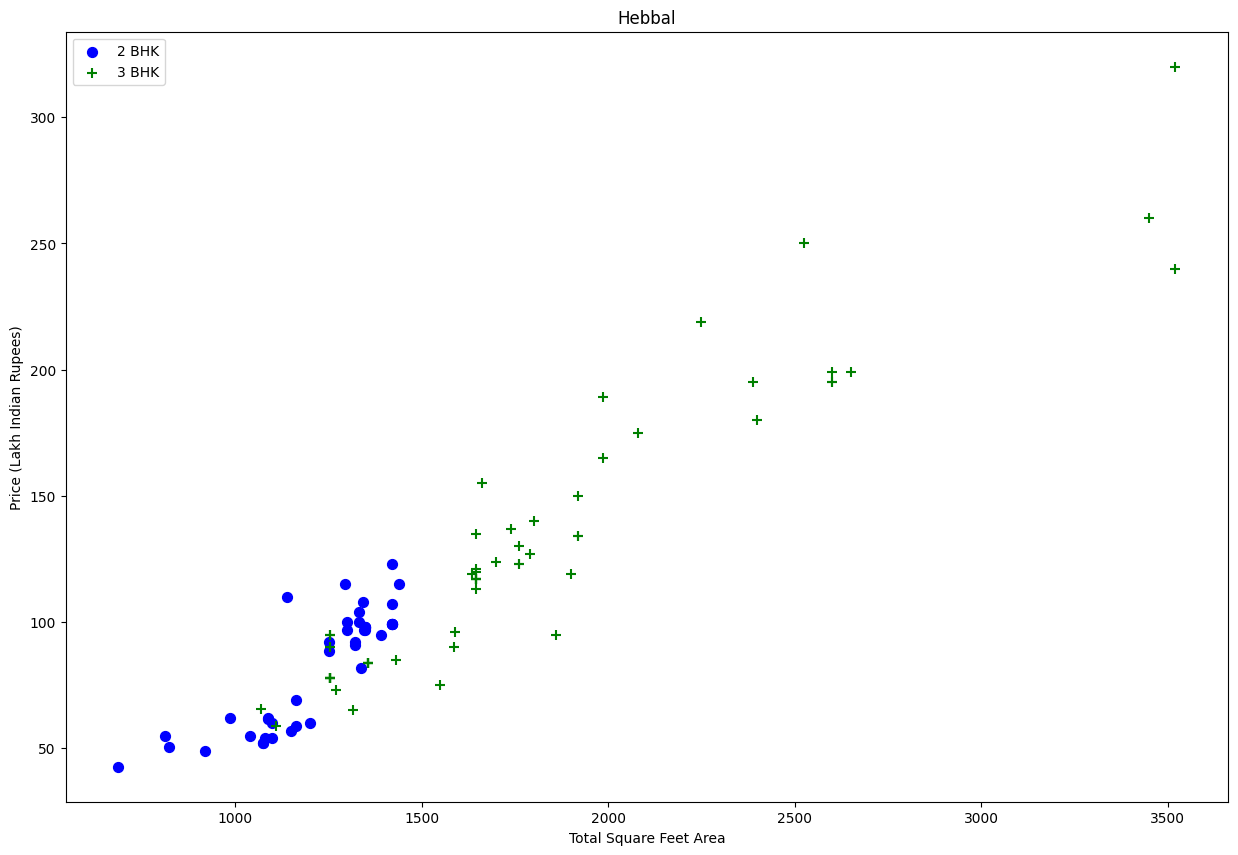

In [46]:
plot_scatter_chart(df7,"Hebbal")

We can also see above, there also many cases where these 2BHK have higher price than 3BHK for same sqft area, so we wanna do some Data cleanup for which we have another function for removing these Outliers

So what this function will do is, it will create a per bedroom homes, it will create some statistics, so the kind of statistics it will create is, it will create a statistics like below
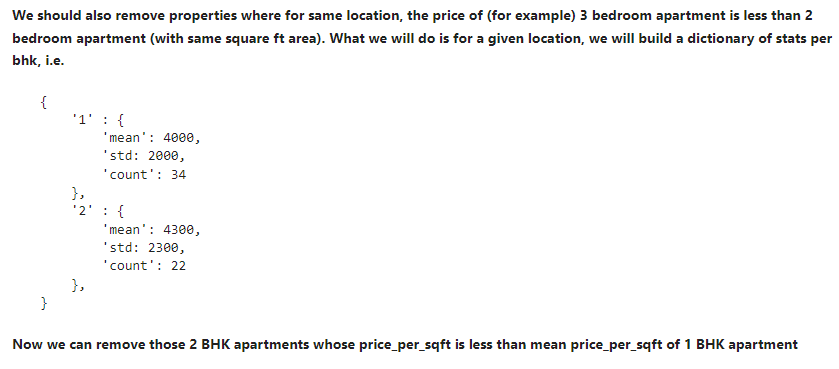

In [47]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

So above in the function, first it will do location groupby, going through every locations DF and for eevry location DF we will again create a new DF based on bhk column, and per bhk DF, we are computing Mean, STD and Count, and once that For loop is over, we are running the same For loop again and trying to exclude those datapoints which lies beyond whose values of price per sqft is less than the mean of the previous bhk

For example, for 2BHK, we will try to filter all thoe values whose price per sqft is less than the mean of 1BHK mean

So we will call the function on df7 and store it in a new DF called df8

In [48]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

As u can see above, we now have 7k datas, it removed so many datapoints

Now, after this is done, we can again plot the same Scatter plot to see if what kinda improvements it has done

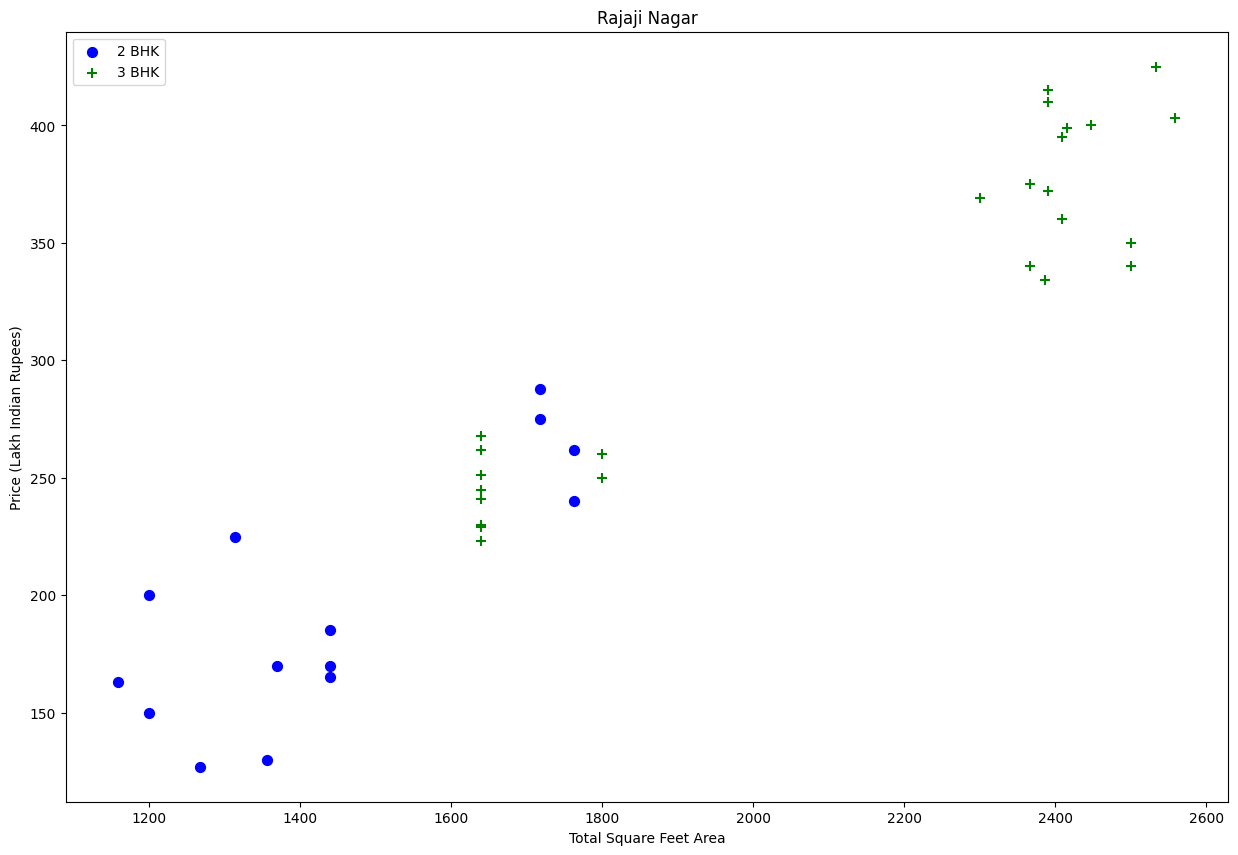

In [49]:
plot_scatter_chart(df8,"Rajaji Nagar")

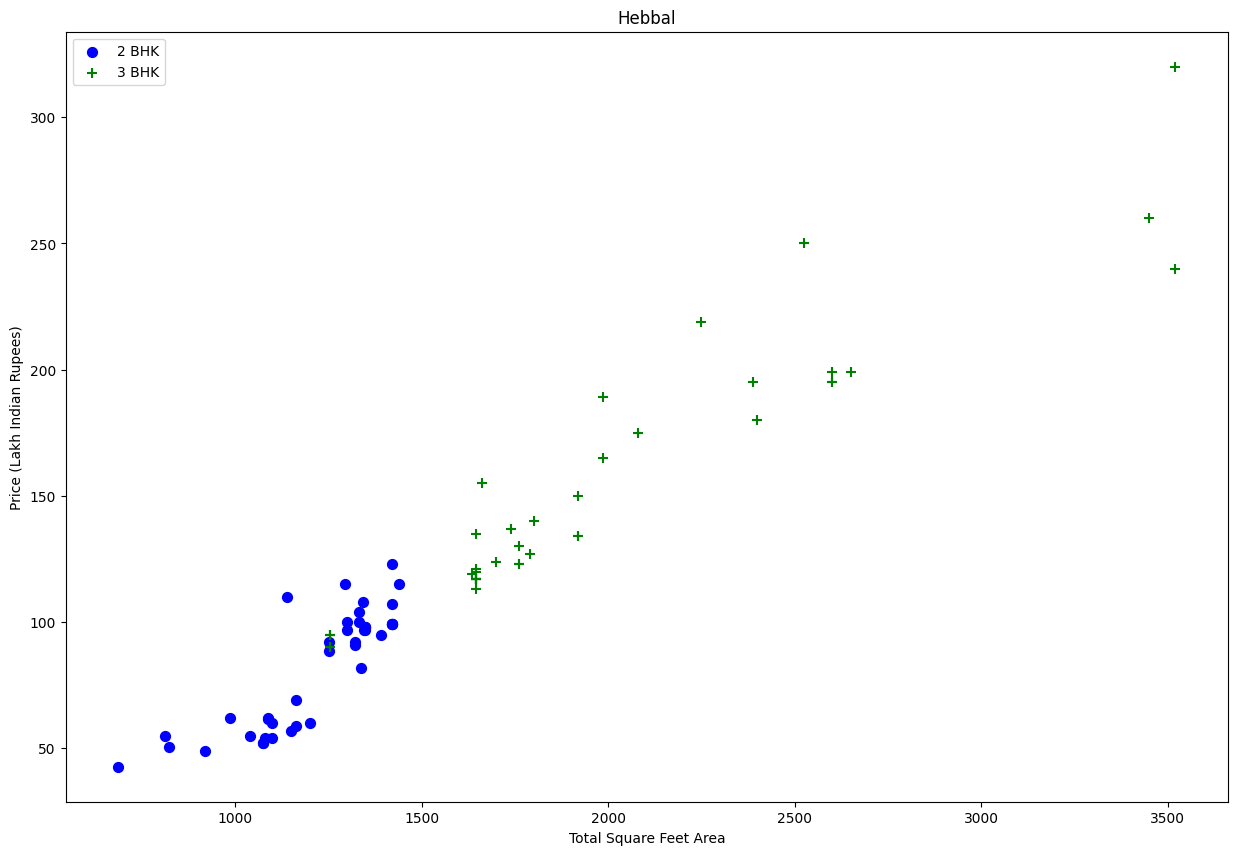

In [50]:
plot_scatter_chart(df8,"Hebbal")

Now u can see that all those green datapoints (3BHK) which we had in that area is removed now so now majority of 3BHK now has higher value than 2BHK

Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function

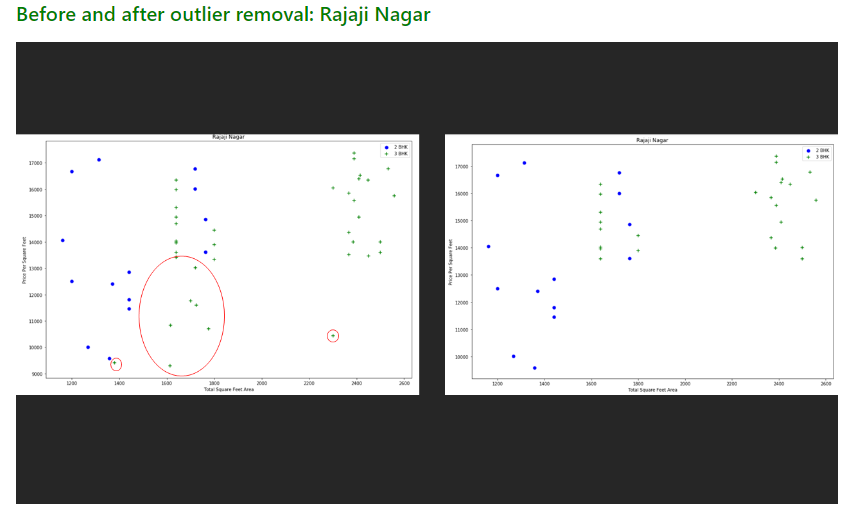
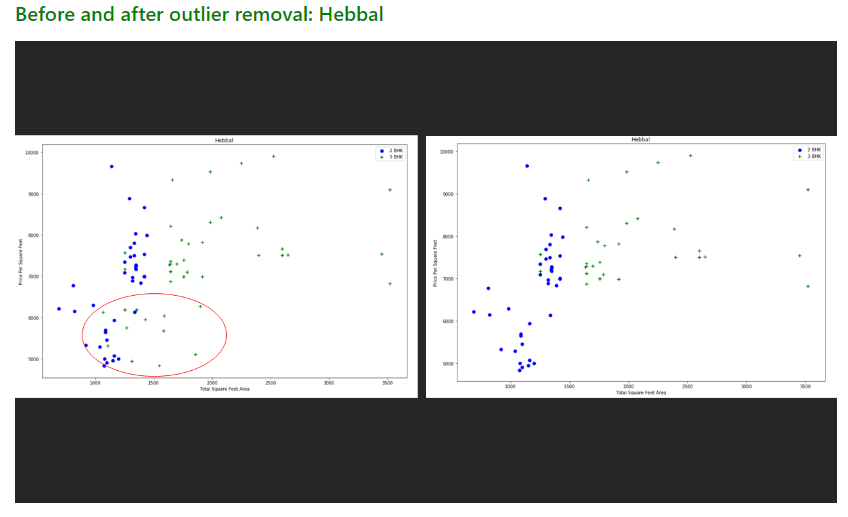

### Histogram

Once this Outliers are removed, lets plot a Histogram to see how many properties we have in per sqft area

Text(0, 0.5, 'Count')

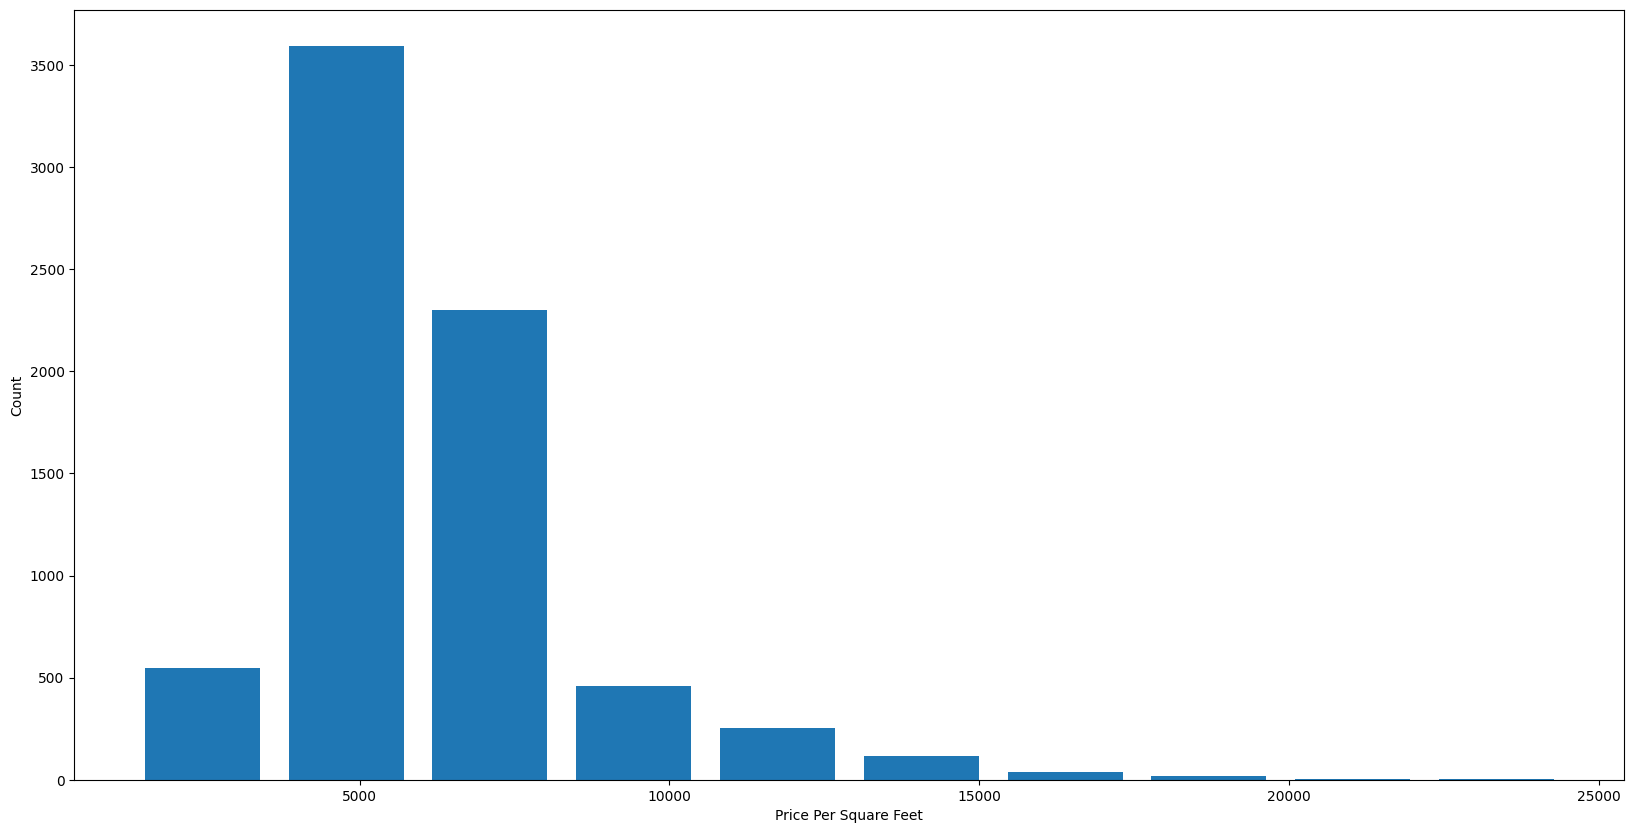

In [51]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

So we can see above that like from 0 to 10000 rupees per sqft range we have majority of our datapoints, you can see that this is a Normal distribution, kind of like a **Gaussian Curve**

So at this point our dataset looks pretty good

Now lets explore the "bath" feature

## Outlier Removal Using Bathrooms Feature

In [52]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

You can see that there are properties which has like 13 bathrooms and its pretty unusual, so lets check all homes which has greater than 10 bathrooms

In [53]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Well some of these are kind of okay, see, u have 12000 sqft home which is pretty big then having 12 bathrooms is okay

So then again we can go to our Business manager and ask him if there is a criteria to remove the bathrooms specific outliers, basically he will tell u that, anytime u have no of bathrooms which are greater than num of BHK, usually when u have 2BHK u have 2 bathrooms, sometimes even 3, but it is very unusual to have like 4, so lets say u have 2BHK and 4 bathrooms, that is kind of unusual, so after disussin with ur Business manager we decide that anytime we have no of bathrooms greater than the bedrooms + 2, we are going to remove those as an Outliers

So before we do that lets plot a Histogram here again

Text(0, 0.5, 'Count')

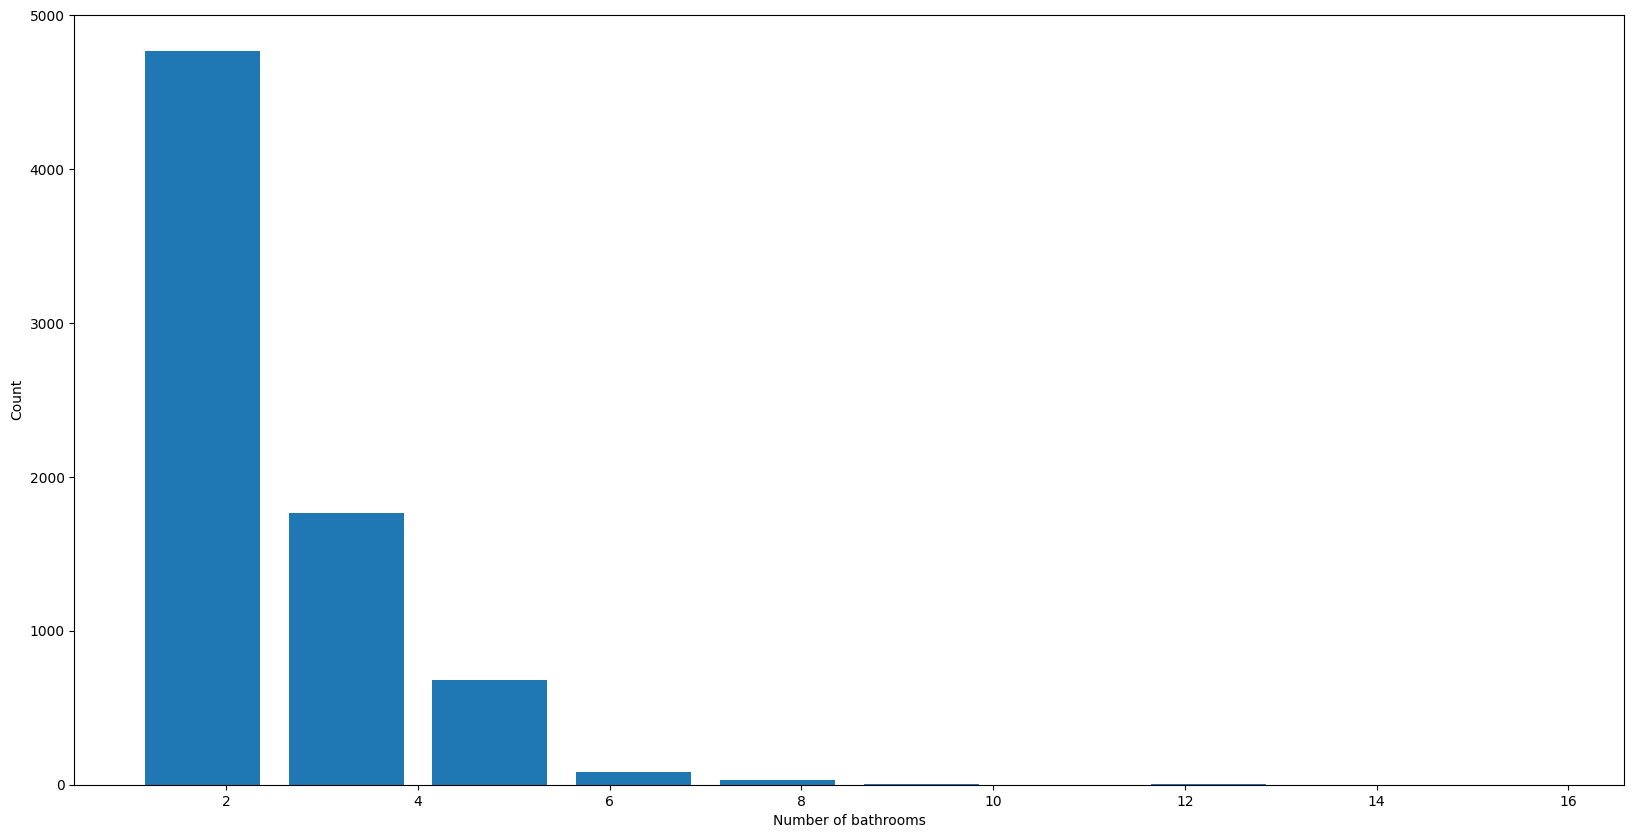

In [54]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

U see, most of the properties have 2 bathrooms and then 4, then 6, etc and there are few Outliers which has more no of bathrooms

In [55]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


We can see there are for exanple  4BHK with 7 bathrooms, 3BHK with 6 bathrooms, etc, so these are outliers, we can remove them and put them in a new DF called df9

In [56]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

Now our DF looks neat and clean, so now we can start preparing it for **Machine Learning** training, and for that we have to drop some unnecessary features, so the price_per_sqft and the size feature at this point is unnecessary cuz for size we already have bhk feature and price_per_sqft can also be dropped cuz we used it only for Outliers detection

So we will create a new DF called df10 where we drop these 2 features

In [57]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# One Hot Encoding

There is one more thing, We have a text data which is location column so we will convert it into numeric using One Hot Encoding

In [60]:
dummies = pd.get_dummies(df10.location).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


You can see above we converted the location column to Numeric and store it in another DF called dummies, now we can append or concat the dummies DF to our main DF which is df10 and create a new DF called df11.

Along with that, to avoid a Dummy variable trap we will drop one column, so we will drop the last column which is "other"

In [63]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now since we have made location colummn into Numeric using One Hot Encoding, we can drop the location column as we dont need it anymmore and create a new DF again called df12

In [65]:
df12 = df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# MODEL BUILDING

Now, we are all set to start **Model Building** 

First lets examine the shape of our DF

In [66]:
df12.shape

(7251, 245)

### X and y splitting

In [70]:
X = df12.drop('price', axis=1)
y = df12.price

### Train Test Splitting

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

### Linear Regression

Now, we will try using Linear Regression on our dataset and check the score and then we will do **K Fold CV** and **GridSearchCV**

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.845227769787434

As u can see above, with Linear Regression we got 84% which is not that bad, typically a Data Scientist would try a couple of models, couple of different parameters to come up with the best optinal model, so thats what we will do

We are going to first do **K Fold Cross Validation**

### Use K Fold cross validation to measure accuracy of our LinearRegression model

**ShuffleSplit()** will randomize ur sample so each of the folds have equal distribution of our datasets so its not just targetting one area

In [74]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

So u can see above, with **Cross Validation** we are kind of getting more than 80% score all the time so we figure out that for Linear Regression even if we run 5 folds **Cross Validation** we are getting score of more than 80%

we can even do the average

In [75]:
np.mean(cross_val_score(LinearRegression(), X, y, cv=cv))

0.8183540750696089

We can see even the average is above 80%

Now, how about we try other Regression Algorithms? 

There are like **Lasso Regression**, **Decision Tree Regressor**, etc

So as a Data Scientist, we will want to try those different Algo and figure out which one gives the best score, so for that we use a method called **GridSearchCV**

### Find best model using GridSearchCV

So other than Linear Regression, we will try Lasso and Decision Tree Regressor

In [77]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

So GridSearchCV will not only find us the best Algo but also the best parameters

So we will just create a function which takes X and y as arguments, then create a dictionary of models and its corresponding parameters, then create a score list to store all the scores, then run a for loop to go through the Dictionary then initializing GridSearchCV object, then training it and then just appending the scores into the scores list, then best_score_ and best_params_ will just give us the best score and best parameters
Then we will just return these into a DF with the following column

In [89]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'positive' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

Now we can call this function into our X and y

In [90]:
find_best_model_using_gridsearchcv(X,y)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", l

,model,best_score,best_params
0,linear_regression,0.819001,"{'copy_X': True, 'fit_intercept': False, 'posi..."
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.720046,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


So u can see above, Linear Regression is clearly performing the best here with the following parameters so we can conclude that Linear Regression model is the best one out of the three so we will use that

### Test the model for few properties

Lets use the Linear Regression model we created above which is already trained with around 84% score, so we will just use that to make prediction for couple of samples just to test it

So for that we will write a predict price function, it will take location, sqft, no of bathroom and bhk as an input and give u the estimated price

In [94]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

So lets make predicition for 1st Phase JP Nagar location with 1000 sqfoot area and 2 bathrooms and 2bhk

In [95]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677191036

Now lets do same thing but for 3 bedrooms and 3 bathrooms

In [96]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395217723

So we got higher here which makes sense since its more no of bedrooms and bhk

Now lets try for another location

In [97]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484006666

In [99]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033352

Now, since our done with Model as well, it is time to Export our model to a pickle file

We will export this as a pickle file and will use the model in a Python Flask or Django server

# Export the tested model to a pickle file

In [100]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

Other than the model, we also need the location and columns information, for example, above in our predict_price() function, we have X.columns, this columns, the way they are sructed and their index in the list is important for making the prediction, so we will import these into a JSON file

# Export location and column information to a file that will be useful later on in our prediction application

In [101]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

Next, we will build a Django or Flask server to use this model to predict house prices in Bangalore